In [19]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt

In [20]:
# Get data
symbol = "BTCUSDT"
timeFrame = "15m"
startDate = "2017-01-01"
endDate = "2022-07-01"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:00:00
1,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:15:00
2,4280.00,4310.07,4267.99,4310.07,21.923552,2017-08-17 04:30:00
3,4310.07,4313.62,4291.37,4308.83,13.948531,2017-08-17 04:45:00
4,4308.83,4328.69,4304.31,4304.31,5.101153,2017-08-17 05:00:00
...,...,...,...,...,...,...
170204,18894.53,18995.36,18881.51,18974.06,732.079530,2022-06-30 23:00:00
170205,18974.07,19029.20,18946.52,19017.33,823.169150,2022-06-30 23:15:00
170206,19017.33,19148.00,19008.03,19070.98,1046.106980,2022-06-30 23:30:00
170207,19070.98,19980.00,19057.18,19942.21,7071.408930,2022-06-30 23:45:00


In [21]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
    "grid_number" : 10,                               ## int  
    "equal_Diff_or_Ratio" : "RATIO",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 4000.0,                          ## float
    "highest_price" : 60000.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

strategy: grid , expected return: 0.0252970448995671 , sharpe ratio: -9.165049912682745
strategy: buy and hold , expected return: 26.43214881613246 , sharpe ratio: 0.34813261549621866


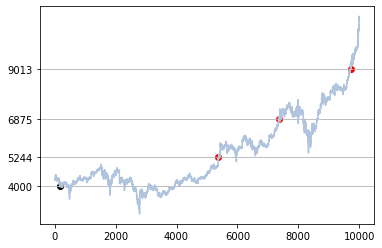

strategy: grid , trading count: 4 , profit: 0.19098275996267375 MDD: 0.0019061871108723408


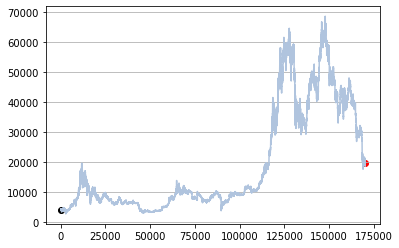

strategy: buy and hold , trading count: 2 , profit: 362.85281169922195 MDD: 0.9589632546504674


In [23]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=10000, window_off=10000)
print("strategy:", myGrid.name, ", expected return:", expected_return * 100, ", sharpe ratio:", sharpe_ratio)
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=10000)
print("strategy:", buy_and_hodl.name, ", expected return:", expected_return * 100, ", sharpe ratio:", sharpe_ratio)

profit, trading_count, buy_record, sell_record, MDD = myGrid.back_test(df)
print("strategy:", myGrid.name, ", trading count:", trading_count, ", profit:", profit * 100, "MDD:", MDD)
profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
print("strategy:", buy_and_hodl.name, ", trading count:", trading_count, ", profit:", profit * 100, "MDD:", MDD)